# Import all necessary libraries


In [72]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import datetime
import time
from pandas.plotting import lag_plot
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
!pip install pmdarima

# import data of stocks and some preprocessing

In [73]:
data1 = pd.read_csv("CSVForDate.csv")
data1.replace(np.nan, inplace = True)
data1.head()

,publish_date,Open,High,Low,Close
0,02-Jan-17,26711.15,26720.98,26447.06,26595.45
1,03-Jan-17,26616.92,26724.40,26488.37,26643.24
2,04-Jan-17,26677.22,26723.37,26606.06,26633.13
3,05-Jan-17,26738.42,26917.21,26738.42,26878.24
4,06-Jan-17,26929.69,27009.61,26733.33,26759.23


In [74]:
data1 = data1[["publish_date","Close"]]
data1.head()

,publish_date,Close
0,02-Jan-17,26595.45
1,03-Jan-17,26643.24
2,04-Jan-17,26633.13
3,05-Jan-17,26878.24
4,06-Jan-17,26759.23


In [75]:
data1['publish_date'] = pd.to_datetime(data1['publish_date'],format = "%d-%m-%Y",infer_datetime_format=True)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   publish_date  992 non-null    datetime64[ns]
 1   Close         992 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.6 KB


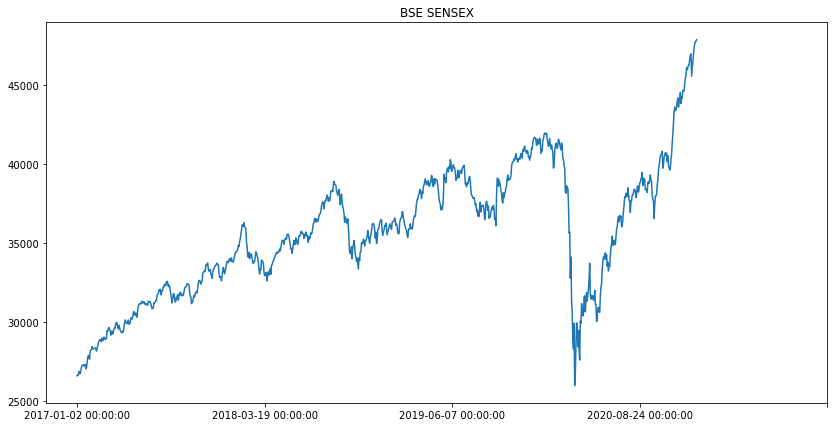

In [76]:
plt.figure(figsize = (14,7))
plt.plot(data1['Close'])
plt.title('BSE SENSEX')
plt.xticks(np.arange(0,1500,300),data1['publish_date'][0:1500:300])
plt.show()

# splitting data and again plotting train and test set

In [77]:
train_data1,test_data1 = data1[:int(len(data1)*0.8)], data1[int(len(data1)*0.8):]
train_data1.info()
test_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   publish_date  793 non-null    datetime64[ns]
 1   Close         793 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 793 to 991
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   publish_date  199 non-null    datetime64[ns]
 1   Close         199 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.2 KB


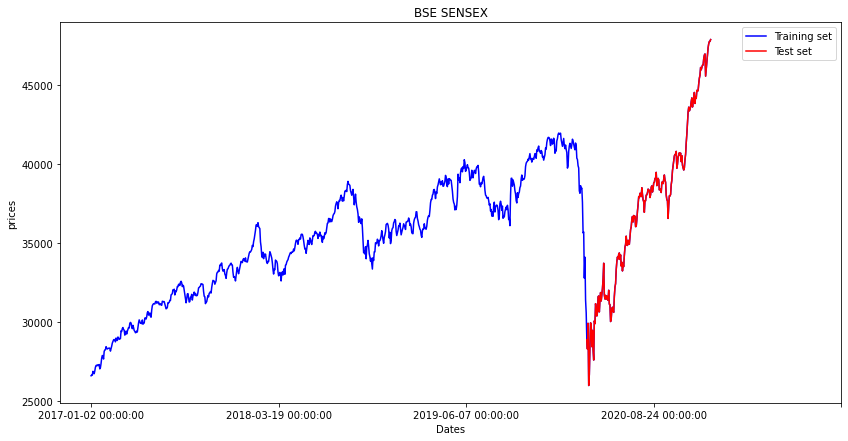

In [79]:
plt.figure(figsize = (14,7))
plt.title('BSE SENSEX')
plt.xlabel('Dates')
plt.ylabel('prices')
plt.plot(data1['Close'],'blue', label='Training set')
plt.plot(test_data1['Close'],'red', label='Test set')
plt.xticks(np.arange(0,1500,300),data1['publish_date'][0:1500:300])
plt.legend()

# Building Arima Model for Forecasting

In [80]:
#first checking the stationarity of the time series using ADF test
from statsmodels.tsa.stattools import adfuller
test_result = adfuller(data1.Close.dropna())
print(f"Sratistic: {test_result[0]}")
print(f"p_value: {test_result[1]}")

Sratistic: -1.4337083638434227
p_value: 0.5660135225734986


In [9]:
from pmdarima.arima import auto_arima
model1 = auto_arima(train_data1['Close'],start_p=0, start_q=0,
                   test ="adf",max_p=3,max_q=3, m=1,d=None, seasonal =False,
                   D=0, trace =True,suppress_warnings=True, stepwise=True)
print(model1.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11414.251, Time=1.88 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11416.208, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11416.225, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11412.441, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11412.383, Time=0.61 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11397.878, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11396.511, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=11398.019, Time=0.25 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=11399.877, Time=0.58 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=11394.568, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=11414.392, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=11396.088, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=11395.946, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=11410.576, Time=0.24 sec
 ARIMA(3,1,1)(0,0,0

In [81]:
model_1=ARIMA(train_data1["Close"], order=(2,1,0))
fited = model_1.fit(disp=-1)
print(fited.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  792
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -5693.286
Method:                       css-mle   S.D. of innovations            320.381
Date:                Wed, 15 Sep 2021   AIC                          11394.572
Time:                        21:10:32   BIC                          11413.270
Sample:                             1   HQIC                         11401.758
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.0234     14.054      0.286      0.775     -23.522      31.569
ar.L1.D.Close     0.0101      0.035      0.287      0.774      -0.059       0.079
ar.L2.D.Close     0.1802      0.037     

p value is > 0.05 so its not stationary

In [82]:
#So if time series is not stationary we need to differentiate it

from pmdarima.arima.utils import ndiffs
d = ndiffs(data1.Close, test="adf")
print(d)

1


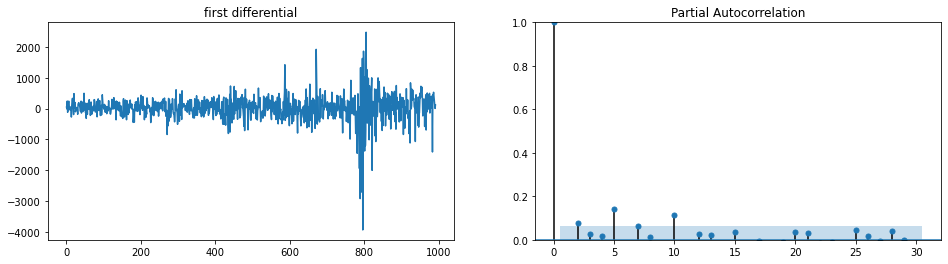

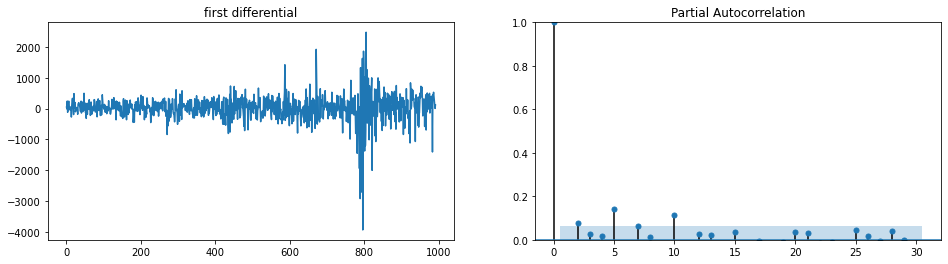

In [12]:
# d value is 1
# to find p value we use partial auto corelation plot PAFC

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
d1 = data1.Close.diff().dropna()
fig, (plot1,plot2) = plt.subplots(1,2, figsize = (16,4))
plot1.plot(d1)
plot1.set_title("first differential")
plot2.set_ylim(0,1)
plot_pacf(d1, ax=plot2)

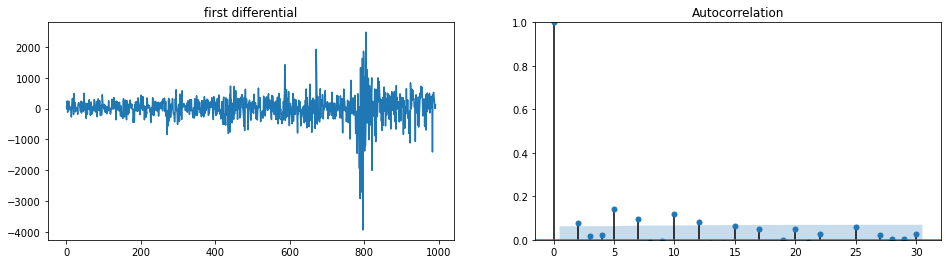

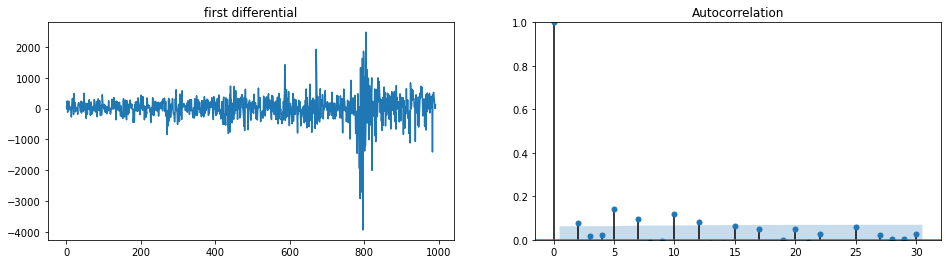

In [83]:
#from above graphs we can see that p value is 2
d2 = data1.Close.diff().dropna()
fig, (plot1,plot2) = plt.subplots(1,2, figsize = (16,4))
plot1.plot(d2)
plot1.set_title("first differential")
plot2.set_ylim(0,1)
plot_acf(d2, ax=plot2)

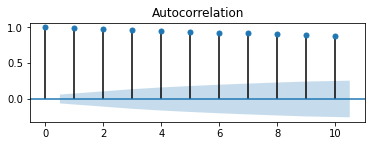

In [14]:
dataset = data1[['Close']]
from matplotlib import pyplot
pyplot.figure()
pyplot.subplot(211)
plot_acf(dataset, ax=pyplot.gca() , lags=10)

pyplot.show()

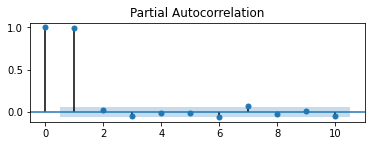

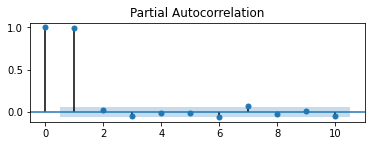

In [84]:
pyplot.subplot(211)
plot_pacf(dataset, ax=pyplot.gca() , lags=10)

In [85]:
# hence q value is also 2
train = train_data1['Close'].values
test = test_data1['Close'].values
history = [x for x in train]
print(type(history))
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
error = mean_squared_error(test, predictions)
print('Testing Mean Squared Error: %.3f' % error)

<class 'list'>
Testing Mean Squared Error: 414566.416


In [17]:
print(predictions)

[array([30085.19793338]), array([28655.67800976]), array([27890.85107073]), array([29839.79247877]), array([26534.98085335]), array([25793.40387641]), array([28526.83758762]), array([30146.28504648]), array([29987.52542996]), array([28465.4165166]), array([29301.04819362]), array([28434.70528042]), array([27496.95408224]), array([29886.37068566]), array([30088.67164463]), array([31079.1418171]), array([30842.94417649]), array([30359.57480072]), array([30566.71203091]), array([31558.44649155]), array([31736.78174841]), array([30703.60281411]), array([31259.70898754]), array([31895.8245133]), array([31399.88785753]), array([31684.85161373]), array([32127.45649816]), array([32718.13815749]), array([33717.02405933]), array([31927.8228178]), array([31352.61207645]), array([31662.14544372]), array([31478.31622789]), array([31621.97091724]), array([31584.03604557]), array([31384.7292823]), array([31962.18370176]), array([31227.25526567]), array([31054.46951844]), array([30104.91862051]), arra

In [86]:
from math import sqrt
rmse = sqrt(error)
print(rmse)

643.8683218428108


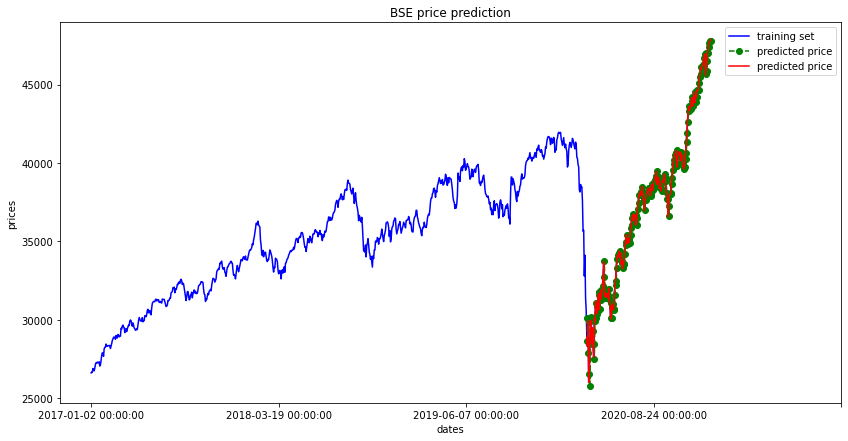

In [88]:
plt.figure(figsize=(14,7))
plt.plot(data1['Close'], 'green', color='blue', label ='training set')
plt.plot(test_data1.index, predictions, color='green', marker='o', label='predicted price', linestyle='dashed')
plt.plot(test_data1.index, test_data1['Close'], color='red',label='predicted price')
plt.title("BSE price prediction")
plt.xlabel("dates")
plt.ylabel("prices")
plt.xticks(np.arange(0,1500,300),data1['publish_date'][0:1500:300])
plt.legend()

# Sentiment Analysis


In [98]:
#import libraries and dataset

import pandas as pd
import numpy as np
%matplotlib inline
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyze = SentimentIntensityAnalyzer()

In [99]:
news = pd.read_csv(r'C:\Users\ABHIGYAN\Desktop\sparks foundation\india-news-headlines.csv')
news.dropna(inplace = True)
news.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [100]:
news.tail()

,publish_date,headline_category,headline_text
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...
3424066,20201231,entertainment.bengali.movies.news,Celebs plan to party safely and responsibly on...


In [101]:
news["publish_date"] = pd.to_datetime(news["publish_date"], format = '%Y%m%d')
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3424067 entries, 0 to 3424066
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   publish_date       datetime64[ns]
 1   headline_category  object        
 2   headline_text      object        
dtypes: datetime64[ns](1), object(2)
memory usage: 104.5+ MB


In [102]:
news = news.drop_duplicates(subset = "publish_date", keep = 'first', inplace = False)
news.reset_index(inplace=True, drop = True)
news

,publish_date,headline_category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,unknown,Powerless north India gropes in the dark
2,2001-01-04,unknown,The string that pulled Stephen Hawking to India
3,2001-01-05,unknown,Light combat craft takes India into club class
4,2001-01-06,unknown,Light combat craft takes India into club class
...,...,...,...
7257,2020-12-27,entertainment.bengali.movies.news,#BigInterview! Dhritiman Chatterjee: Nobody da...
7258,2020-12-28,astrology.horoscope,Horoscope Today; 28 December 2020: Check astro...
7259,2020-12-29,city.bareilly,Man recovers charred remains of 'thief' from h...
7260,2020-12-30,astrology.numerology-tarot,Numerology Readings 30 December 2020: Predicti...


In [103]:
news.drop('headline_category', axis = 'columns', inplace = True)
news

,publish_date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,Powerless north India gropes in the dark
2,2001-01-04,The string that pulled Stephen Hawking to India
3,2001-01-05,Light combat craft takes India into club class
4,2001-01-06,Light combat craft takes India into club class
...,...,...
7257,2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...
7258,2020-12-28,Horoscope Today; 28 December 2020: Check astro...
7259,2020-12-29,Man recovers charred remains of 'thief' from h...
7260,2020-12-30,Numerology Readings 30 December 2020: Predicti...


In [104]:
#now we need to calculate the score of each day headlines

i =0
score = []
while i<len(news):
    n = analyze.polarity_scores(news.iloc[i]['headline_text'])
    score.append(n['compound'])
    i=i+1
    
score = np.array(score)
len(score)

7262

In [105]:
news['Score'] = score
news.head()

,publish_date,headline_text,Score
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.2924
1,2001-01-03,Powerless north India gropes in the dark,-0.4939
2,2001-01-04,The string that pulled Stephen Hawking to India,0.0000
3,2001-01-05,Light combat craft takes India into club class,-0.3400
4,2001-01-06,Light combat craft takes India into club class,-0.3400


In [106]:
i =0
sentiment = []
while i<len(news):
    if(news.iloc[i]['Score']>=0.1):
        sentiment.append('positive')
        i=i+1
    elif(news.iloc[i]['Score']>-0.1) & (news.iloc[i]['Score']<0.1):
        sentiment.append('neutral')
        i=i+1
    elif(news.iloc[i]['Score']<-0.1):
        sentiment.append('negative')
        i=i+1

In [107]:
news['sentiment_report'] = sentiment
news.head()

,publish_date,headline_text,Score,sentiment_report
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.2924,positive
1,2001-01-03,Powerless north India gropes in the dark,-0.4939,negative
2,2001-01-04,The string that pulled Stephen Hawking to India,0.0000,neutral
3,2001-01-05,Light combat craft takes India into club class,-0.3400,negative
4,2001-01-06,Light combat craft takes India into club class,-0.3400,negative


In [122]:
# now merging the two datsets on  date

data2 = pd.merge(data1, news, how='left', on ='publish_date')
data2.dropna(inplace=True)
data2

,publish_date,Close,headline_text,Score,sentiment_report
0,2017-01-02,26595.45,Destress plan for the first Monday of 2017,0.0000,neutral
1,2017-01-03,26643.24,State opposition dismisses Samajwadi Party feu...,0.0772,neutral
2,2017-01-04,26633.13,Rudra Soni ready to go bald for TV; not Bollyw...,0.4199,positive
3,2017-01-05,26878.24,Decoding Buddhist prayer flags,0.0000,neutral
4,2017-01-06,26759.23,Will stay bachelor to serve Akhilesh; says thr...,0.0000,neutral
...,...,...,...,...,...
986,2020-12-24,46973.54,How to set the mood for sex during cold winters,0.0000,neutral
987,2020-12-28,47353.75,Horoscope Today; 28 December 2020: Check astro...,-0.6597,negative
988,2020-12-29,47613.08,Man recovers charred remains of 'thief' from h...,-0.4019,negative
989,2020-12-30,47746.22,Numerology Readings 30 December 2020: Predicti...,0.7096,positive


In [126]:
data3 = data2[['Close','sentiment_report']]
data3

,Close,sentiment_report
0,26595.45,neutral
1,26643.24,neutral
2,26633.13,positive
3,26878.24,neutral
4,26759.23,neutral
...,...,...
986,46973.54,neutral
987,47353.75,negative
988,47613.08,negative
989,47746.22,positive


In [127]:
data3.groupby(['sentiment_report']).mean()

,Close
sentiment_report,
negative,36003.756335
neutral,35491.944946
positive,35648.652491
